<a href="https://colab.research.google.com/github/morgwork/Distantly-Reading-IPCC-Reports/blob/main/IPCCM4_(4_21).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**This codebook cleans and analyzes the fourth IPCC Working Group III report published in 2007. The  PDF is 863 pages, and a permanent link is available [here](https://archive.ipcc.ch/publications_and_data/ar4/wg3/en/contents.html). I converted the PDF into a TXT file with ABBY Fine Reader 14.**


## Cleaning
In this section, I clean the files for analysis. 

In [1]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [2]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords

In [3]:
import string

all_punctuation = string.punctuation

print(f"All punctuation: {all_punctuation}")

All punctuation: !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [4]:
# Remove stopwords function.

def remove_Stopwords(text):
    stop_words = set(stopwords.words('english')) 
    words = word_tokenize( text.lower() ) 
    sentence = [w for w in words if not w in stop_words]
    return " ".join(sentence)

# Lemmatize function.    
def lemmatize_text(text):
    wordlist=[]
    lemmatizer = WordNetLemmatizer() 
    sentences=sent_tokenize(text)
    for sentence in sentences:
        words=word_tokenize(sentence)
        for word in words:
            wordlist.append(lemmatizer.lemmatize(word))
    return ' '.join(wordlist) 

# Cleaning text function.
def clean_text(text): 
    delete_dict = {sp_character: '' for sp_character in string.punctuation} 
    delete_dict[' '] = ' ' 
    table = str.maketrans(delete_dict)
    text1 = text.translate(table)
    textArr= text1.split()
    text2 = ' '.join([w for w in textArr]) 
    
    return text2.lower()


In [5]:
with open("/content/IPCC4M.txt", "r", encoding='utf-8') as text:
    IPCCM4 = text.read()

In [6]:
MC1=IPCCM4.lower() # remove casing
MC2=MC1
print(MC2[:500])

﻿i v x z s' //i
climate change 2007
mitigation of climate change
climate change 2007
mitigation of climate change
the intergovernmental panel on climate change (ipcc) was set tip jointly by the world meteorological organization and the united nations environment programme to provide an authoritative international statement of scientific understanding of climate change. the ipcc’s periodic assessments of the causes, impacts and possible response strategies to climate change are the most comprehen


In [7]:
for p in all_punctuation:

  MC3=MC2.replace(p,'')

In [8]:
MC4=remove_Stopwords(MC3)

In [9]:
MC5=lemmatize_text(MC4)

In [10]:
MC6=clean_text(MC5)

## Analysis
In this section, I will analyze the cleaned files with some basic word counts to highlight significant terms. I will also create a few WordCloud visualizations for each report, one with all collocates true and two or three that remove disproportionately represented terms and bigrams.

In [11]:
IPCCM4words= MC6.split()
print('Number of words in IPCCM3:',len(IPCCM4words))

Number of words in IPCCM3: 442395


In [12]:
import time
time.sleep(5) 

In [13]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stopword = stopwords.words("english")
time.sleep(10) 

word_tokens = nltk.word_tokenize(MC6)
MC7= [word for word in word_tokens if word not in stopword]
time.sleep(10) # this does not crash, but it will not print. may be more useful with even larger files. 


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
print(MC7[:100])

['\ufeffi', 'v', 'x', 'z', 'climate', 'change', '2007', 'mitigation', 'climate', 'change', 'climate', 'change', '2007', 'mitigation', 'climate', 'change', 'intergovernmental', 'panel', 'climate', 'change', 'ipcc', 'set', 'tip', 'jointly', 'world', 'meteorological', 'organization', 'united', 'nation', 'environment', 'programme', 'provide', 'authoritative', 'international', 'statement', 'scientific', 'understanding', 'climate', 'change', 'ipcc', '’', 'periodic', 'assessment', 'cause', 'impact', 'possible', 'response', 'strategy', 'climate', 'change', 'comprehensive', 'uptodate', 'report', 'available', 'subject', 'form', 'standard', 'reference', 'concerned', 'climate', 'change', 'academia', 'government', 'industry', 'worldwide', 'three', 'working', 'group', 'many', 'hundred', 'international', 'expert', 'ass', 'climate', 'change', 'fourth', 'assessment', 'report', 'report', 'consists', 'three', 'main', 'volume', 'umbrella', 'title', 'climate', 'change', '2007', 'available', 'cambridge', 'u

In [15]:
MC8= [word for word in MC7 if word.isalnum()] 

In [16]:
MC9=[x for x in MC8 if not (x.isdigit() 
                            or x[0] == '-' and x[1:].isdigit())] # good for eliminating numbers

In [17]:
print(MC9[:100])

['v', 'x', 'z', 'climate', 'change', 'mitigation', 'climate', 'change', 'climate', 'change', 'mitigation', 'climate', 'change', 'intergovernmental', 'panel', 'climate', 'change', 'ipcc', 'set', 'tip', 'jointly', 'world', 'meteorological', 'organization', 'united', 'nation', 'environment', 'programme', 'provide', 'authoritative', 'international', 'statement', 'scientific', 'understanding', 'climate', 'change', 'ipcc', 'periodic', 'assessment', 'cause', 'impact', 'possible', 'response', 'strategy', 'climate', 'change', 'comprehensive', 'uptodate', 'report', 'available', 'subject', 'form', 'standard', 'reference', 'concerned', 'climate', 'change', 'academia', 'government', 'industry', 'worldwide', 'three', 'working', 'group', 'many', 'hundred', 'international', 'expert', 'ass', 'climate', 'change', 'fourth', 'assessment', 'report', 'report', 'consists', 'three', 'main', 'volume', 'umbrella', 'title', 'climate', 'change', 'available', 'cambridge', 'university', 'press', 'climate', 'change'

In [18]:
from nltk import FreqDist
freq = FreqDist(MC9)
print(freq.most_common(100))

[('emission', 5328), ('energy', 5120), ('change', 3066), ('climate', 3058), ('policy', 2958), ('mitigation', 2916), ('cost', 2487), ('technology', 2425), ('development', 2226), ('pp', 2163), ('country', 2106), ('et', 2102), ('al', 2102), ('carbon', 1853), ('potential', 1817), ('sector', 1702), ('global', 1694), ('scenario', 1609), ('use', 1556), ('reduction', 1481), ('fuel', 1451), ('ghg', 1445), ('chapter', 1411), ('co2', 1382), ('gas', 1361), ('u', 1335), ('also', 1250), ('economic', 1220), ('study', 1217), ('system', 1208), ('environmental', 1205), ('may', 1091), ('efficiency', 1075), ('building', 1063), ('sustainable', 1027), ('price', 1000), ('new', 982), ('impact', 981), ('level', 969), ('international', 957), ('agreement', 955), ('world', 945), ('industry', 943), ('increase', 933), ('management', 919), ('high', 915), ('waste', 893), ('option', 876), ('model', 853), ('developing', 849), ('transport', 824), ('r', 815), ('forest', 814), ('report', 813), ('effect', 792), ('market', 

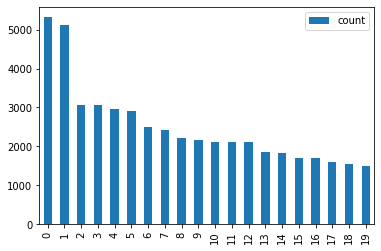

In [19]:
import pandas as pd

df = pd.DataFrame(list(freq.most_common(20)))
df.columns =['word', 'count']
df.plot(kind='bar');

In [20]:
print(df)

           word  count
0      emission   5328
1        energy   5120
2        change   3066
3       climate   3058
4        policy   2958
5    mitigation   2916
6          cost   2487
7    technology   2425
8   development   2226
9            pp   2163
10      country   2106
11           et   2102
12           al   2102
13       carbon   1853
14    potential   1817
15       sector   1702
16       global   1694
17     scenario   1609
18          use   1556
19    reduction   1481


In [21]:
MC11=freq.most_common(100)
MC11

[('emission', 5328),
 ('energy', 5120),
 ('change', 3066),
 ('climate', 3058),
 ('policy', 2958),
 ('mitigation', 2916),
 ('cost', 2487),
 ('technology', 2425),
 ('development', 2226),
 ('pp', 2163),
 ('country', 2106),
 ('et', 2102),
 ('al', 2102),
 ('carbon', 1853),
 ('potential', 1817),
 ('sector', 1702),
 ('global', 1694),
 ('scenario', 1609),
 ('use', 1556),
 ('reduction', 1481),
 ('fuel', 1451),
 ('ghg', 1445),
 ('chapter', 1411),
 ('co2', 1382),
 ('gas', 1361),
 ('u', 1335),
 ('also', 1250),
 ('economic', 1220),
 ('study', 1217),
 ('system', 1208),
 ('environmental', 1205),
 ('may', 1091),
 ('efficiency', 1075),
 ('building', 1063),
 ('sustainable', 1027),
 ('price', 1000),
 ('new', 982),
 ('impact', 981),
 ('level', 969),
 ('international', 957),
 ('agreement', 955),
 ('world', 945),
 ('industry', 943),
 ('increase', 933),
 ('management', 919),
 ('high', 915),
 ('waste', 893),
 ('option', 876),
 ('model', 853),
 ('developing', 849),
 ('transport', 824),
 ('r', 815),
 ('forest',

In [22]:
MC11[-15:]

[('biomass', 626),
 ('research', 622),
 ('different', 621),
 ('would', 619),
 ('land', 615),
 ('target', 608),
 ('supply', 598),
 ('year', 597),
 ('approach', 597),
 ('project', 597),
 ('process', 596),
 ('technological', 593),
 ('section', 593),
 ('evidence', 583),
 ('air', 580)]

In [23]:
MC10=','.join(MC9)
import pandas as pd
df=pd.DataFrame({'author': ['IPCC'], 'report': MC10}) 
df

,author,report
0,IPCC,"v,x,z,climate,change,mitigation,climate,change..."


In [24]:
import numpy as np
import matplotlib.pyplot as plt
import string
import seaborn as sns
from wordcloud import WordCloud

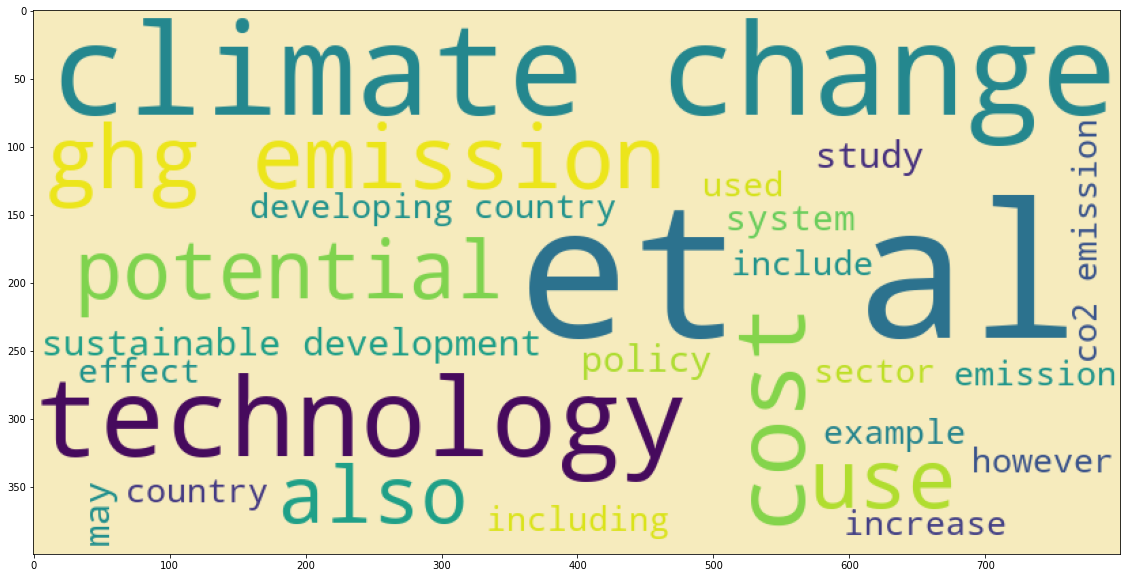

In [25]:
wordcloud = WordCloud(background_color=(246,235,189),max_words=25, width=800, height=400,random_state=30,stopwords=[]).generate(' '.join(df['report'].tolist()))
plt.figure( figsize=(20,10))
plt.imshow(wordcloud); # basic cloud

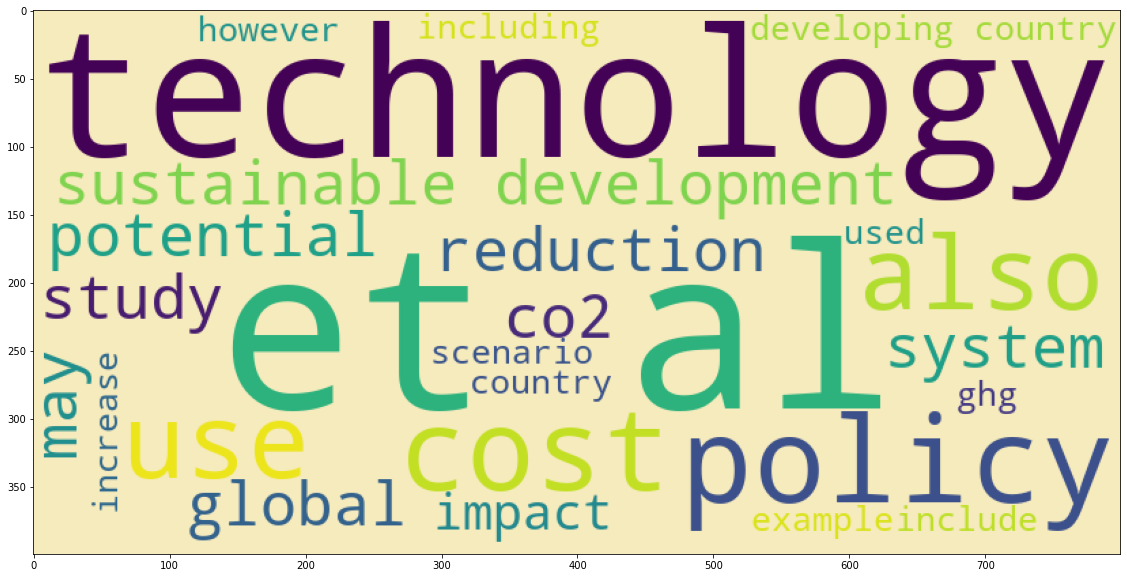

In [26]:
wordcloud = WordCloud(background_color=(246,235,189),max_words=25, width=800, height=400,random_state=30,stopwords=["climate", "change", "emission", "emissions"]).generate(' '.join(df['report'].tolist()))
plt.figure( figsize=(20,10))
plt.imshow(wordcloud); # removing some of the more prominent terms

# can remove words with the stopwords function in first line. because it reads for bigrams, have to remove individual terms 

# add ",collocations=False" before generate function in first line to stop bigrams and focus on individual terms; must be in parentheses

# change max_words number to increase or limit terms

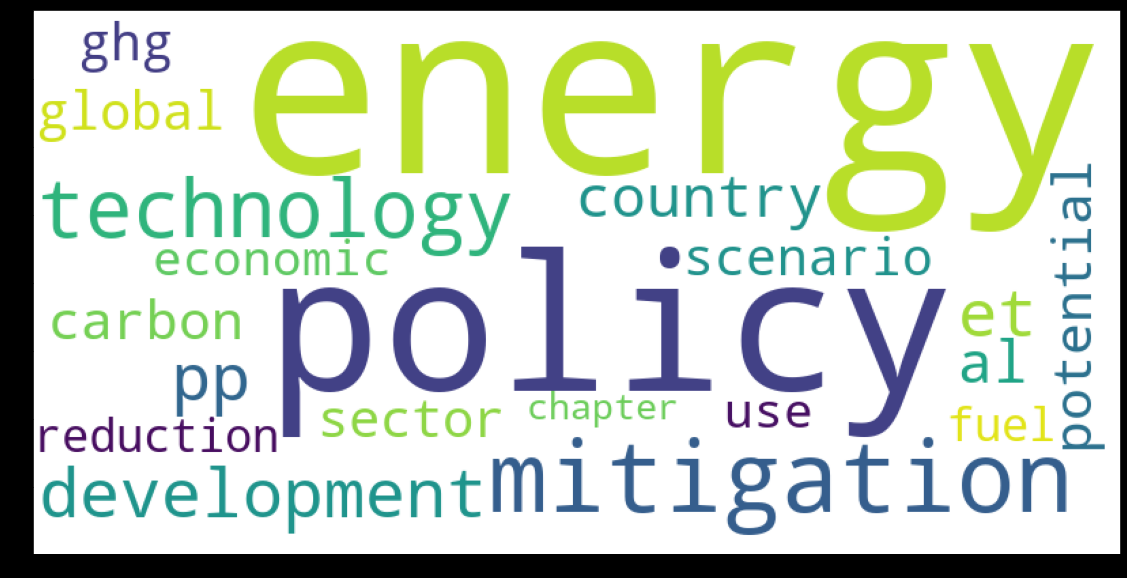

In [27]:
wordcloud_ab = WordCloud(background_color="white",max_words=20, width=800, height=400,stopwords=["climate", "change", "emission", "may", "cost"], collocations=False).generate(' '.join(df['report'].tolist()))
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud_ab); # removing bigrams and select stopwords

In [28]:
occurrences = MC10.count("climate")
print("Number of times the word \'warming\' appears:", occurrences)

Number of times the word 'warming' appears: 3275
